# Telco Customer Churn

### Dataset

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

[IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents


In [2]:
#IMPORT THE REQUIRED LIBRARY

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

**load dataset**

In [3]:
telco_data=pd.read_csv("/Users/apple/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
display(telco_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telco_data.shape

(7043, 21)

In [6]:
print(f"There are {telco_data.shape[0]} rows and {telco_data.shape[1]} columns in the dataset")

There are 7043 rows and 21 columns in the dataset


In [8]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
#Checkung the data types of columns in the dataset
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#check the descriptive statistics of numeric variables in the dataset
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Insights**

* 'SeniorCitizen' is categorical, hence the 25%-50%-75% distribution is invalid.
* 75% customers have 'tenure' less than 55 months.
* Average monthly charges are USD64 whereas 25% custonmers pay more than USD89.85 per month*


In [12]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(9.444444444444445, 0.5, 'Target Variable')

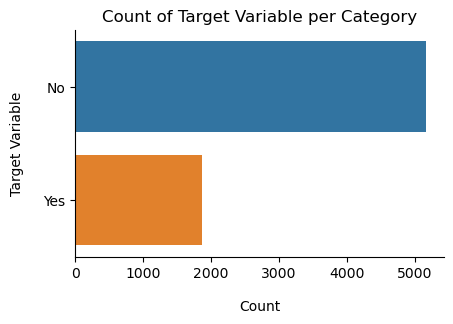

In [27]:
sns.catplot(data=telco_data, kind="count", y="Churn", height=3, aspect=1.5) 
plt.title("Count of Target Variable per Category")
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)

In [24]:
100*telco_data['Churn'].value_counts()/len(telco_data)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**Insights**

* Data is highly skewed with a churn ratio 73:27.
* Perform Univariate analyis.


In [29]:
# Summary of the Dataframe
telco_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


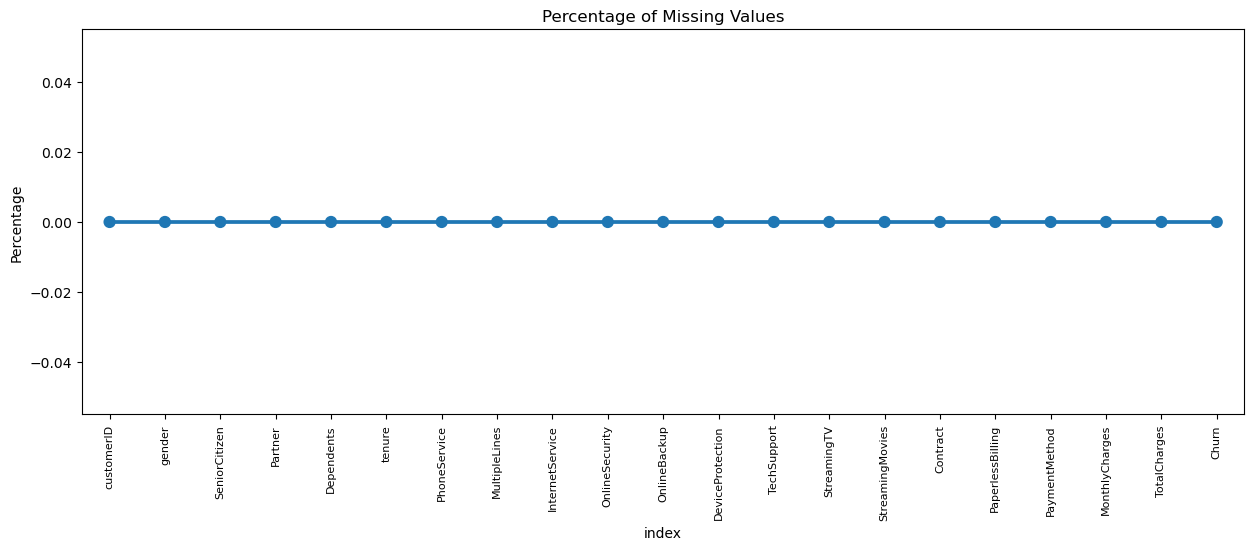

In [33]:
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
plt.figure(figsize=(15,5))
ax=sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90, fontsize=8)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

**Data Cleaning**

* Create a copy of base data for manipulation & processing

In [46]:
t_data=telco_data.copy()

* Total Chargies should be numeric amount. Let's convert it to numerical data type

In [47]:
t_data.TotalCharges=pd.to_numeric(t_data.TotalCharges, errors='coerce')
t_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* There are 11 missing values in TotalCharges column. Let's check these records

In [48]:
t_data.loc[t_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Treating missing values**

* Since the % of these records compared to the total dataset is 0.15%. It is safe to remove them for further processing.

In [49]:
# Removing missing values

t_data.dropna(how='any', inplace=True)

* Categorize 'tenure' into bins e.g. 'tenue' < 12 months: assign a tenure 1-12, tenure between 1-2yrs, tenure group 13-24

In [50]:
# Group tenure in bins of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1, t_data['tenure'].max(), 12)]
t_data["tenure_grp"]=pd.cut(t_data.tenure, range(1, 80, 12), right=False, labels=labels)
t_data["tenure_grp"].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_grp, dtype: int64

* Remove columns not requird for modeling

In [51]:
# drop columns CustomerID and tenure

t_data.drop(["customerID","tenure"], axis=1, inplace=True)
display(t_data)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1-12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1-12


**Data Exploration**

* Plot distribution of features by churn



**Univariate Analysis**

<Figure size 640x480 with 0 Axes>

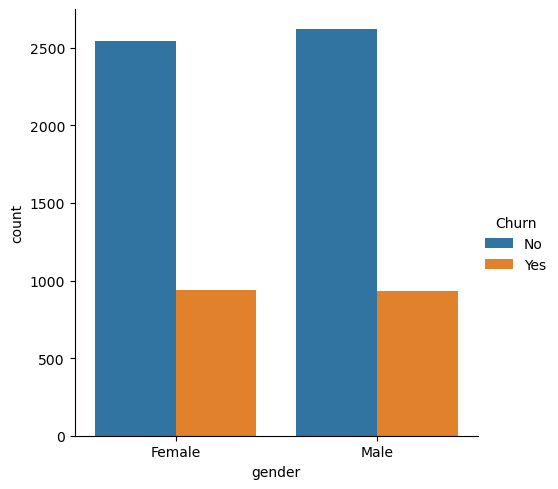

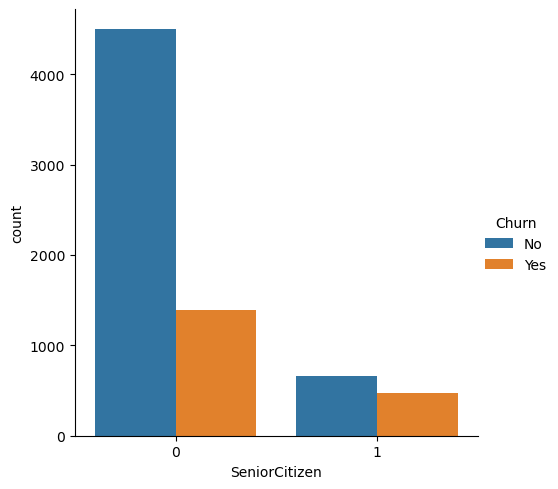

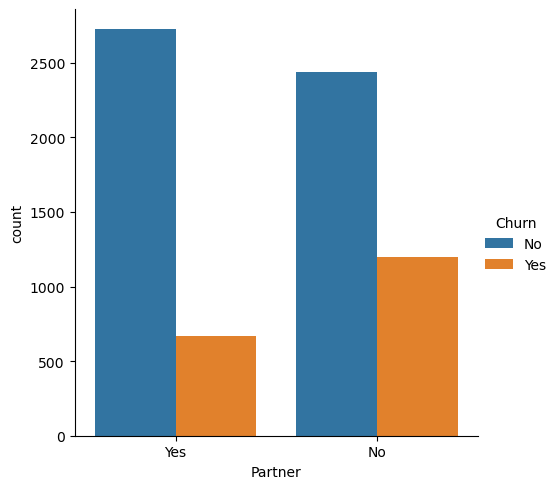

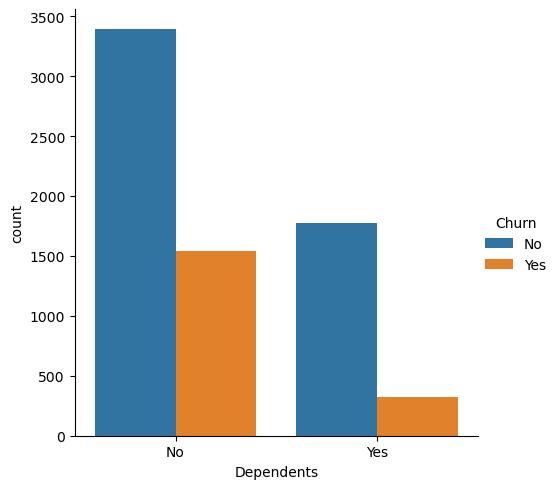

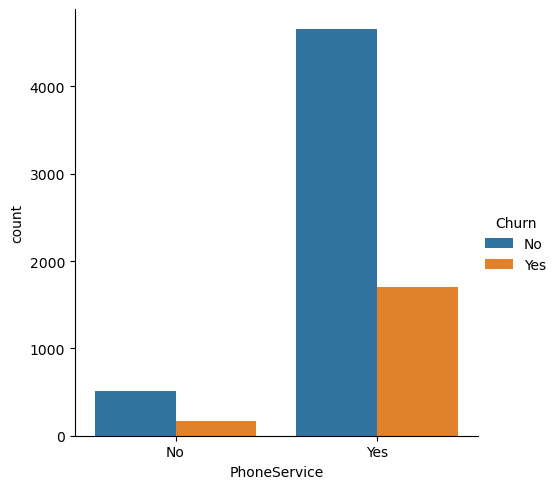

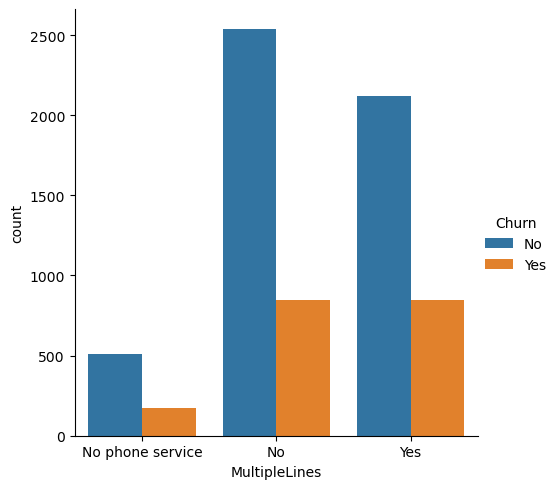

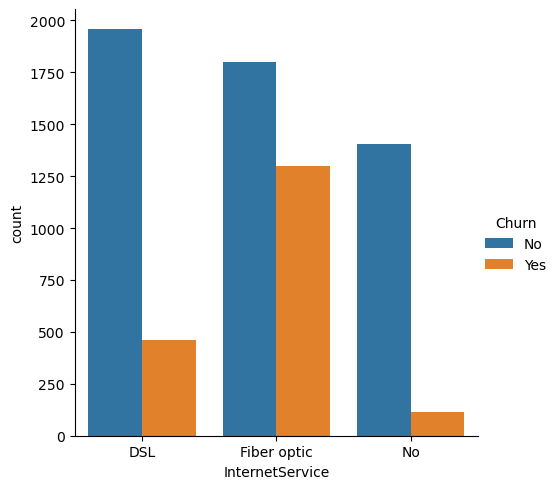

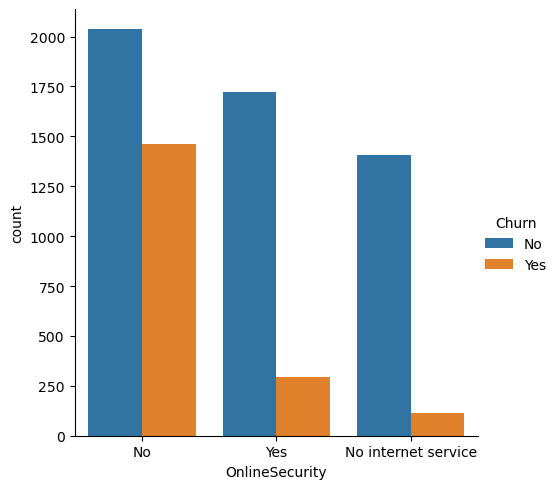

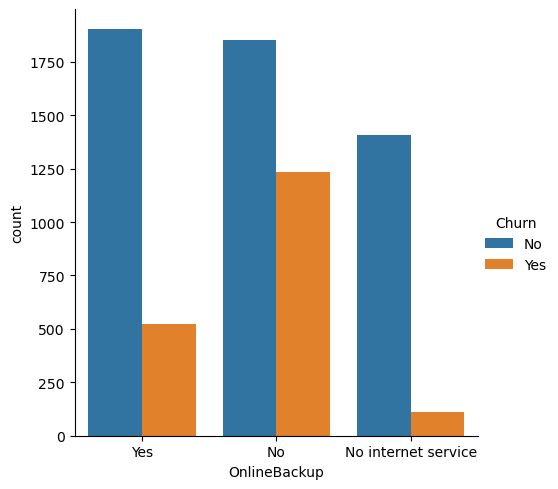

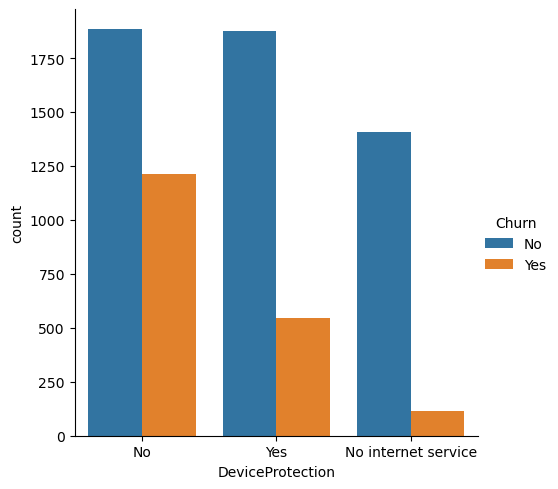

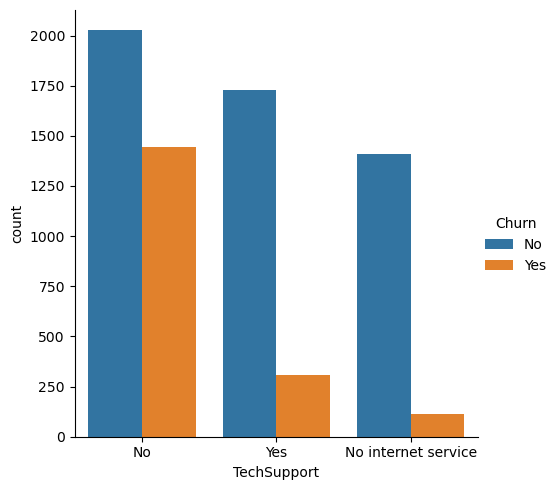

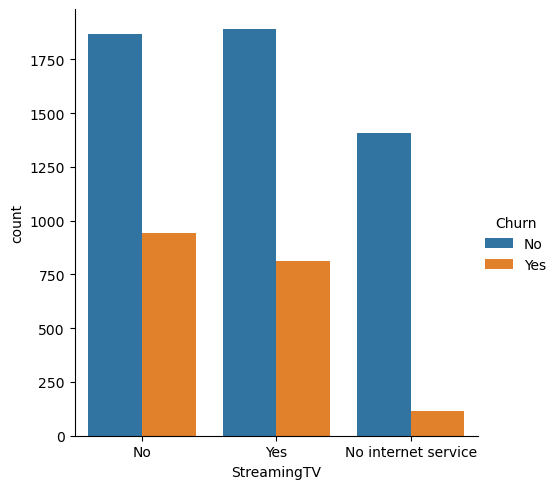

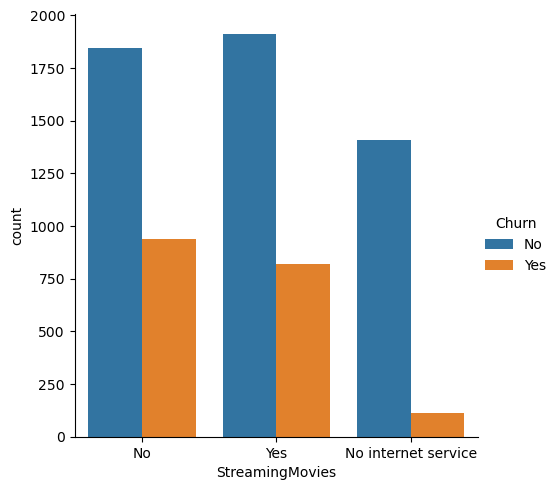

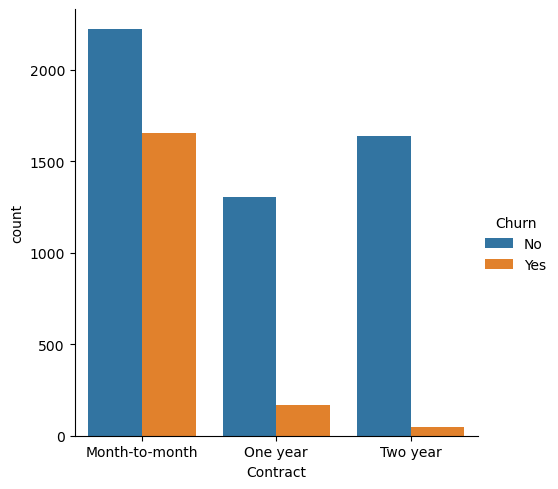

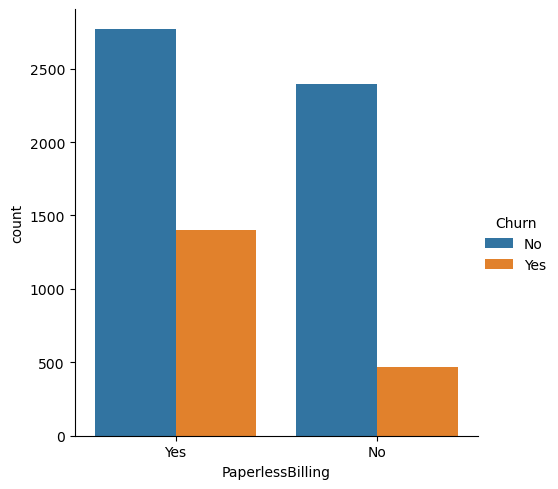

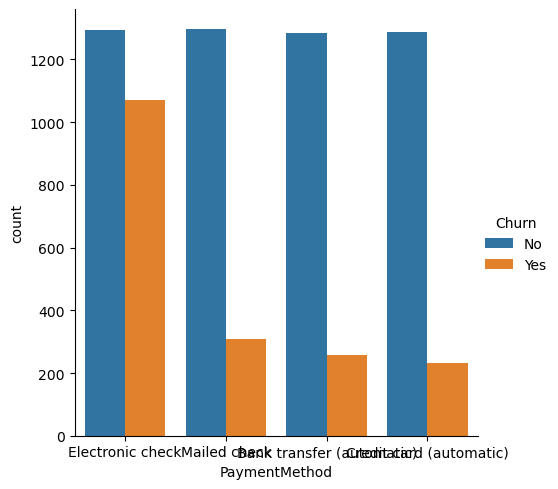

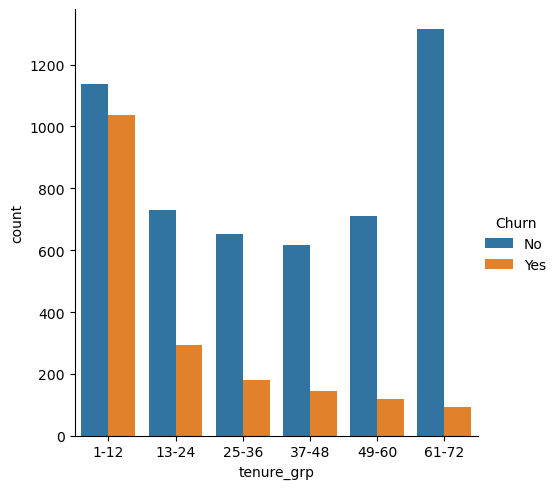

In [52]:
for i, features in enumerate(t_data.drop(columns=["Churn", "TotalCharges", "MonthlyCharges"])):
    plt.figure(i)
    sns.catplot(data=t_data, x=features, hue="Churn", kind='count')
    

* Convert target variable "Churn" to binary numeric variable i.e. Yes=1 ; No=0

In [53]:
t_data["Churn"]=t_data["Churn"].map({"Yes":1, "No":0 })

In [54]:
display(t_data)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13-24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61-72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1-12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1-12


* Convert all categorical variables to dummy variables


In [62]:
t_data_dummies=pd.get_dummies(t_data)
display(t_data_dummies)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


* Relationship between Monthly Charges and Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

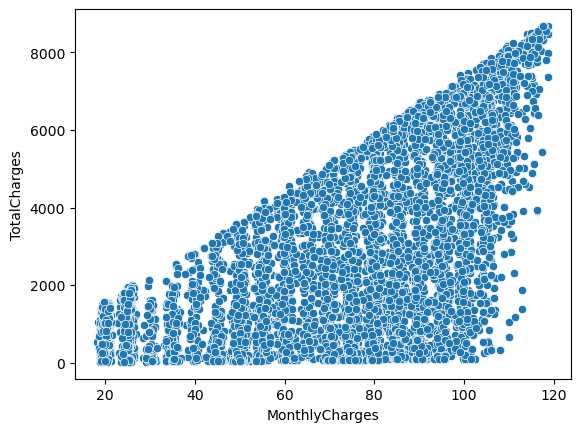

In [70]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=t_data_dummies)

* As expected, Total charges increases as Monthly charges increases. There is high positive correlation between Total Charges and Monthly Charges

**Churn by Monthly charges and Total charges**


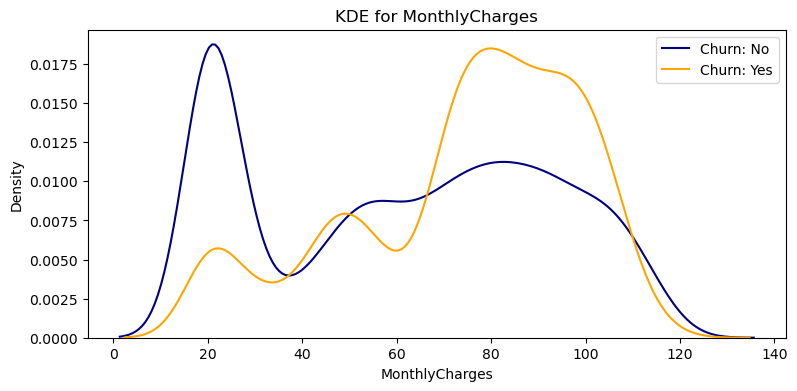

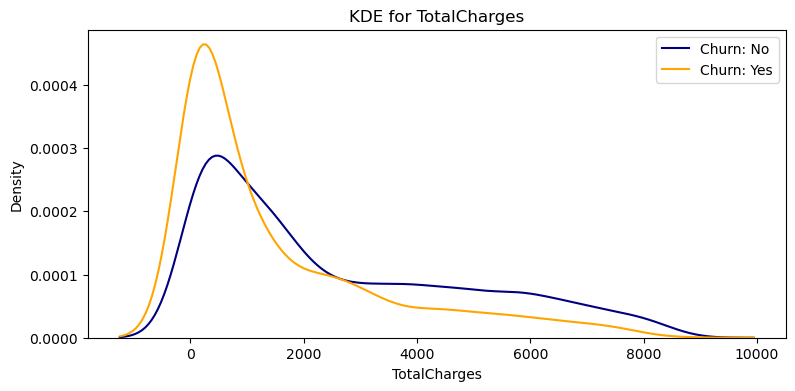

In [74]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(t_data_dummies[t_data_dummies['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(t_data_dummies[t_data_dummies['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
    plt.legend()
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

**Insights**

* High churn at lower total charges. 
* FRom the plot above, and using the features 'tenure', monthlycharges', 'totalcharges' as to gain better insights; Higher monthly charges at lower tenure leads to lower total charges. Therefore, all 3 features **Higher Monthly charges, Lower tenure** and **Lower Total charge** are linked to **High Churn**

<Axes: >

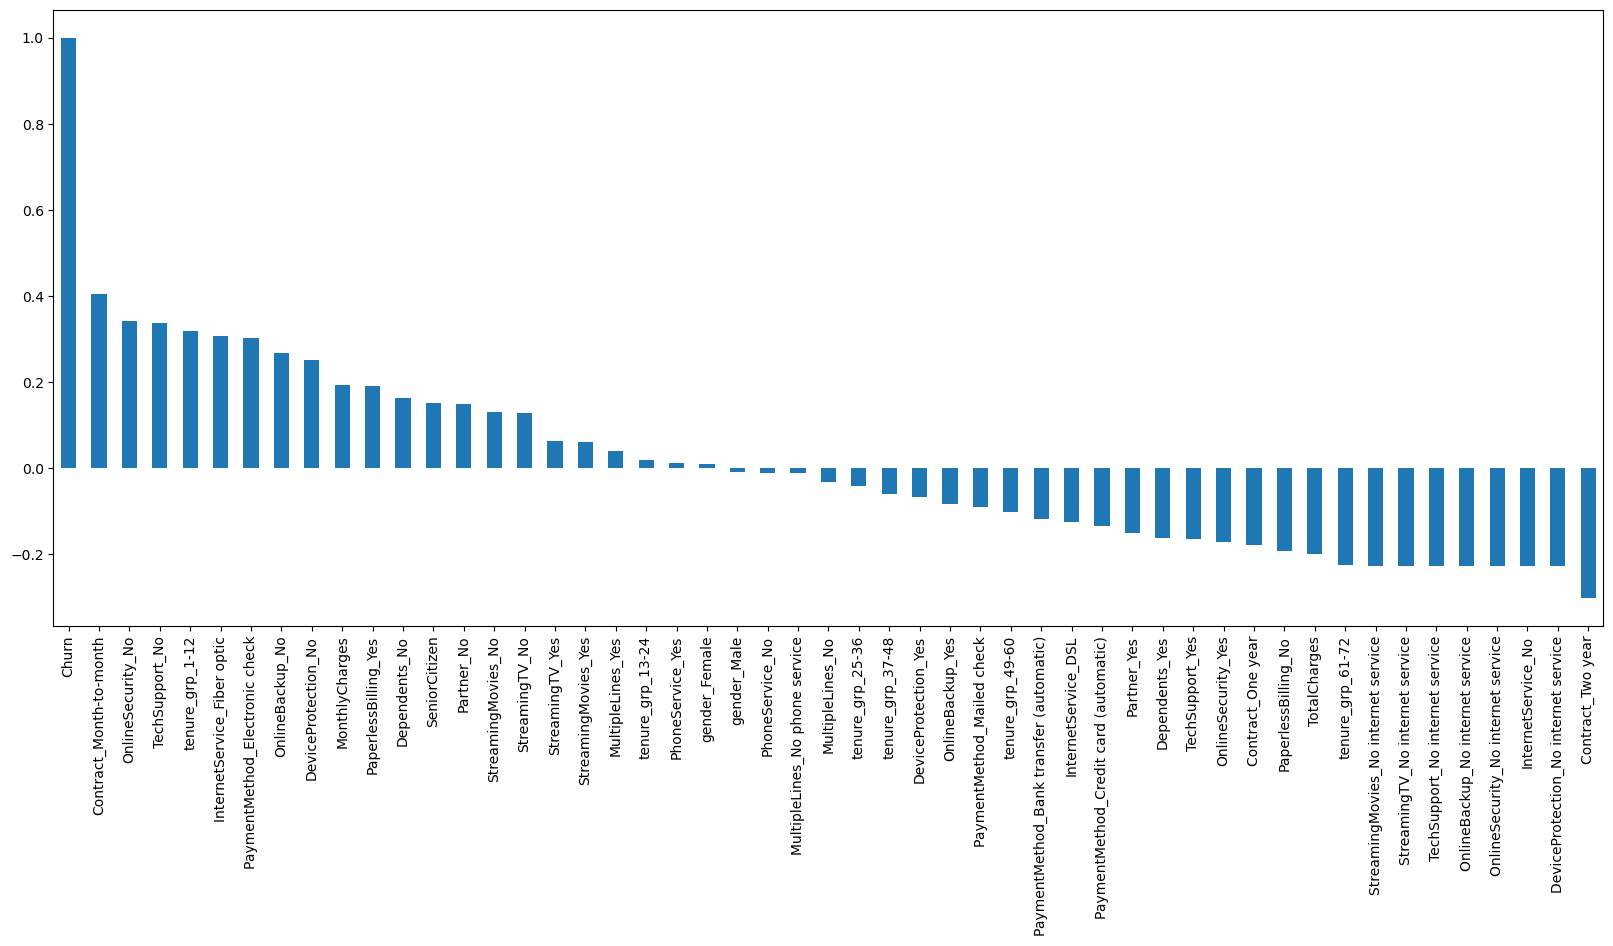

In [75]:
# Build a correlation of all predictore/features with churn

plt.figure(figsize=(20,8))
t_data_dummies.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

**Insights**

* High Churn when customers are on a **month to month contract, No online security, No tech support, first year subscription, fiber optic internet service, electronic check payment method...**

* Low churn were seen in customers with **Long term contracts, 5 year plan, dependents, partners...**.

* **No Phone service, multiple lines and gender** has almost no impact on the churn.

This is evident in the heat map shown below;

<Axes: >

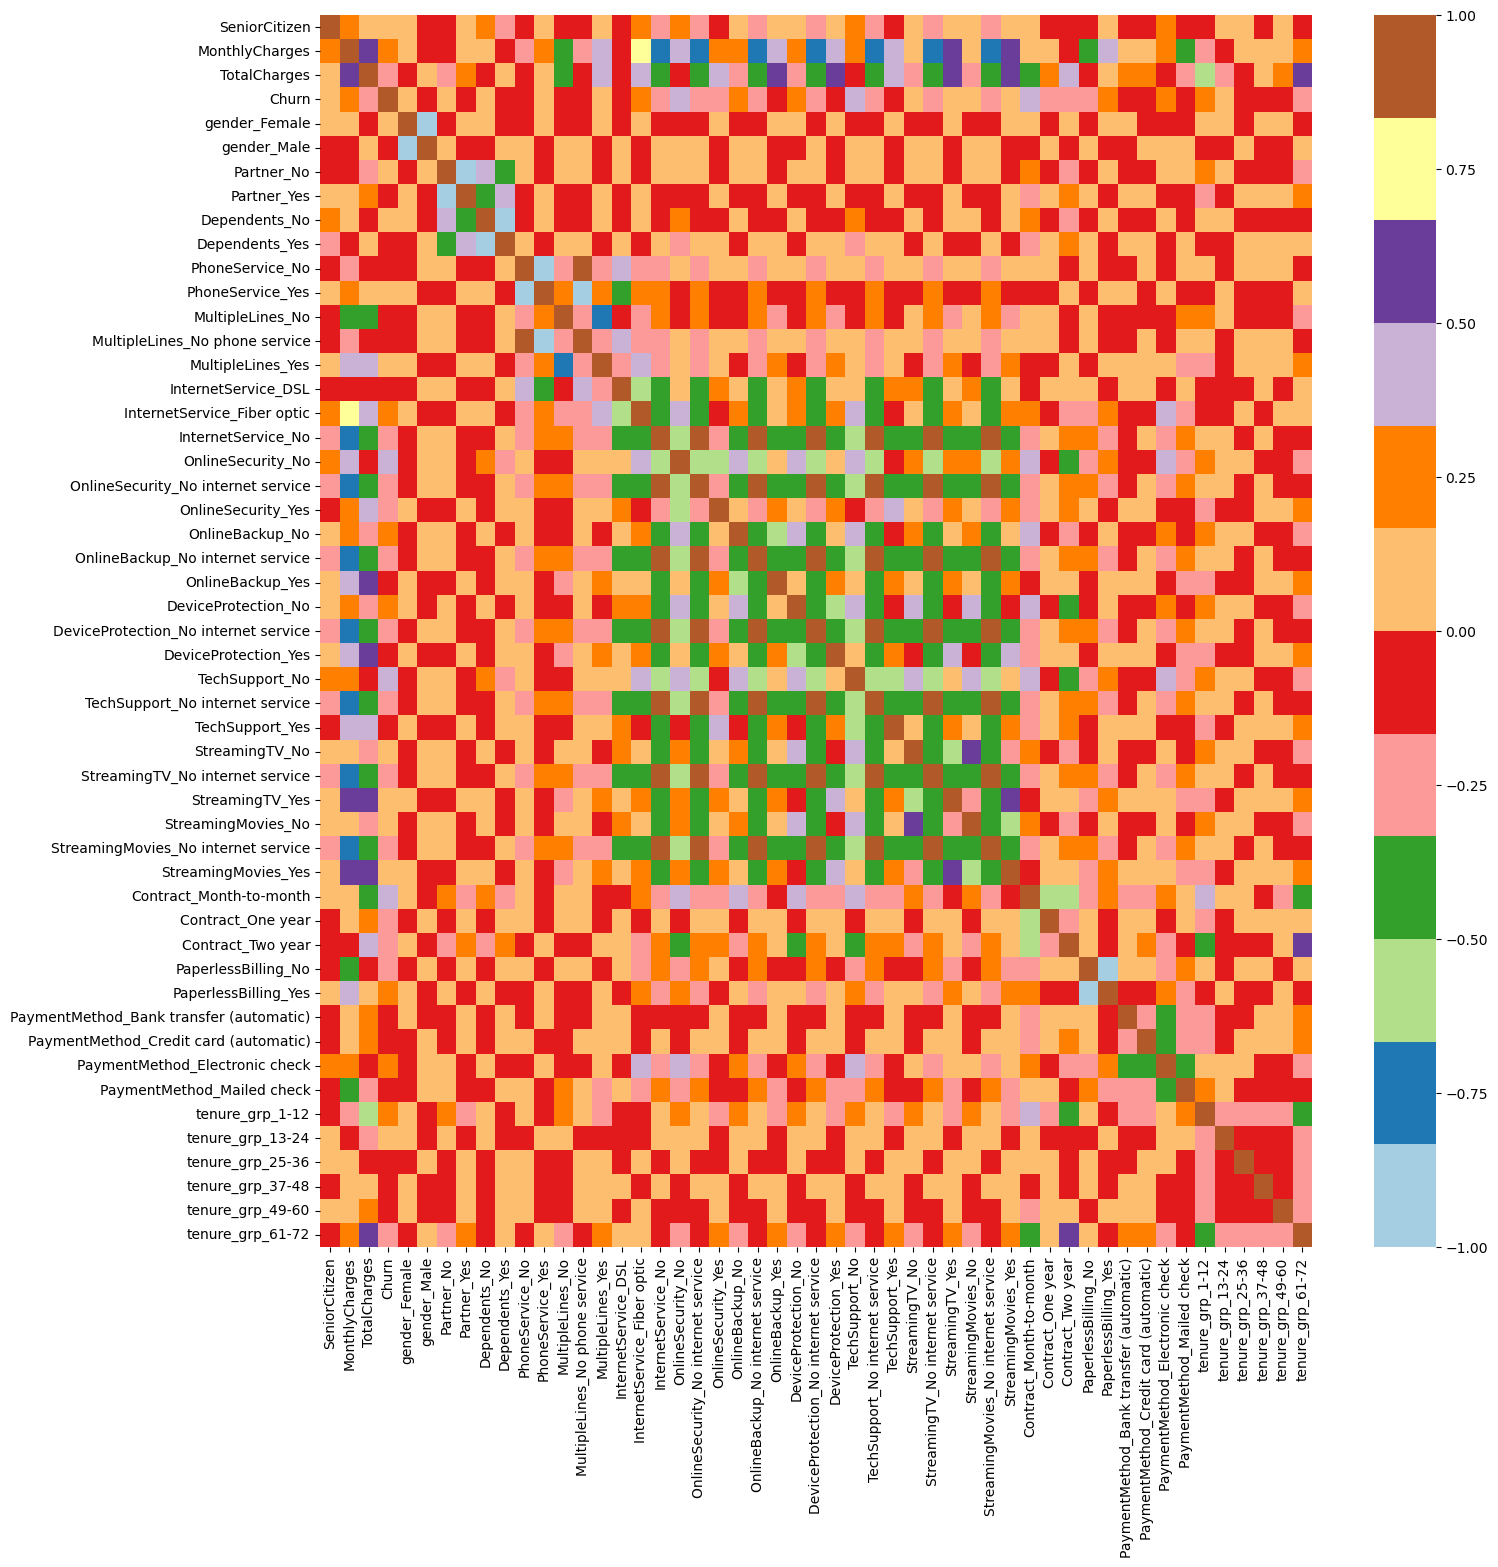

In [82]:
# Correlation using heatmap

plt.figure(figsize=(16,16))
sns.heatmap(t_data_dummies.corr(), cmap="Paired")

**Bivariate Analysis**

In [83]:
# Create 2 dataframes categorized by churn

df_ch0=t_data.loc[t_data["Churn"]==0]
df_ch1=t_data.loc[t_data["Churn"]==1]

In [97]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, 
                   palette='bright')
    
    plt.show()

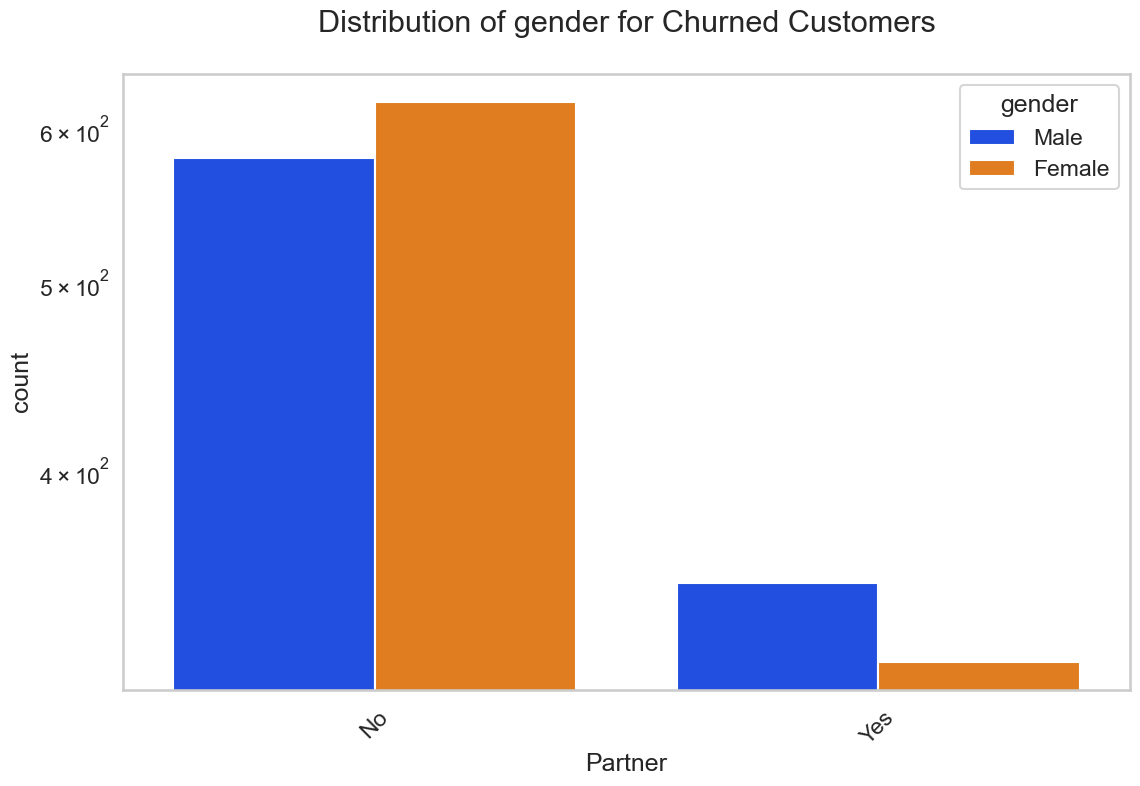

In [98]:
uniplot(df_ch1, col='Partner', title="Distribution of gender for Churned Customers", hue='gender')

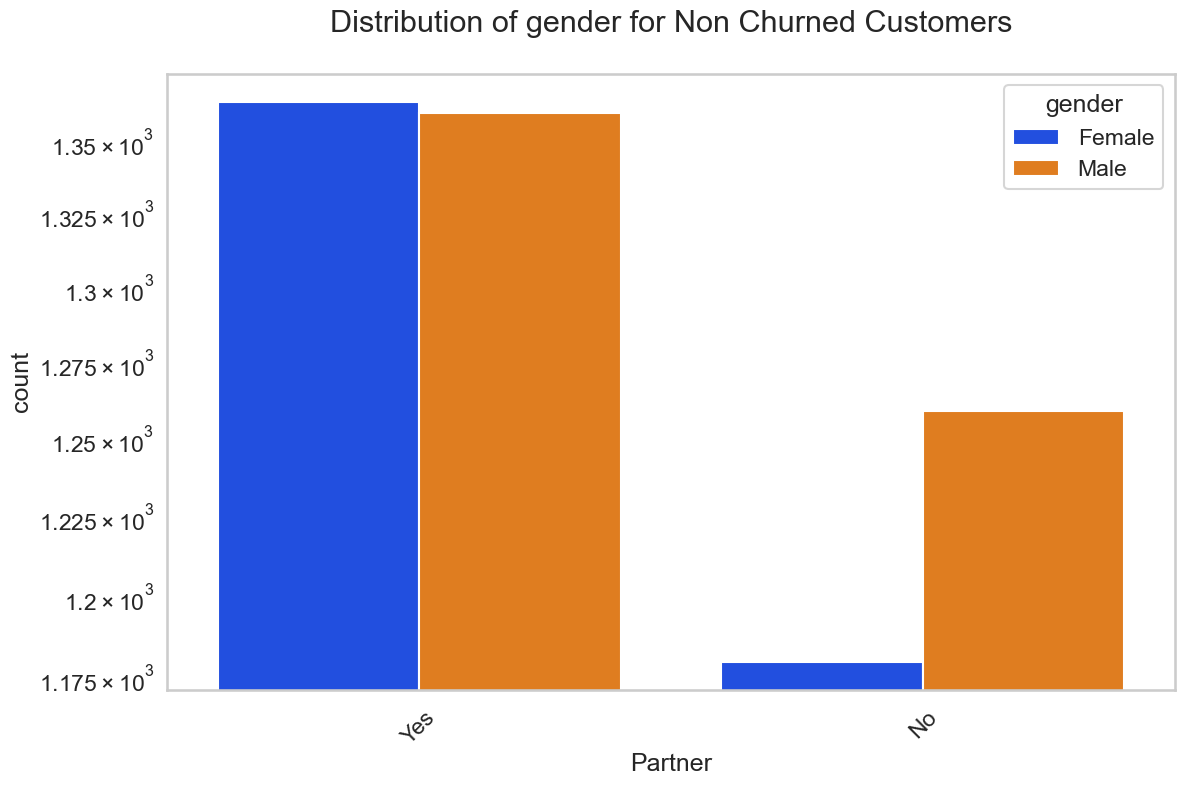

In [99]:
uniplot(df_ch0, col='Partner', title="Distribution of gender for Non Churned Customers", hue='gender')

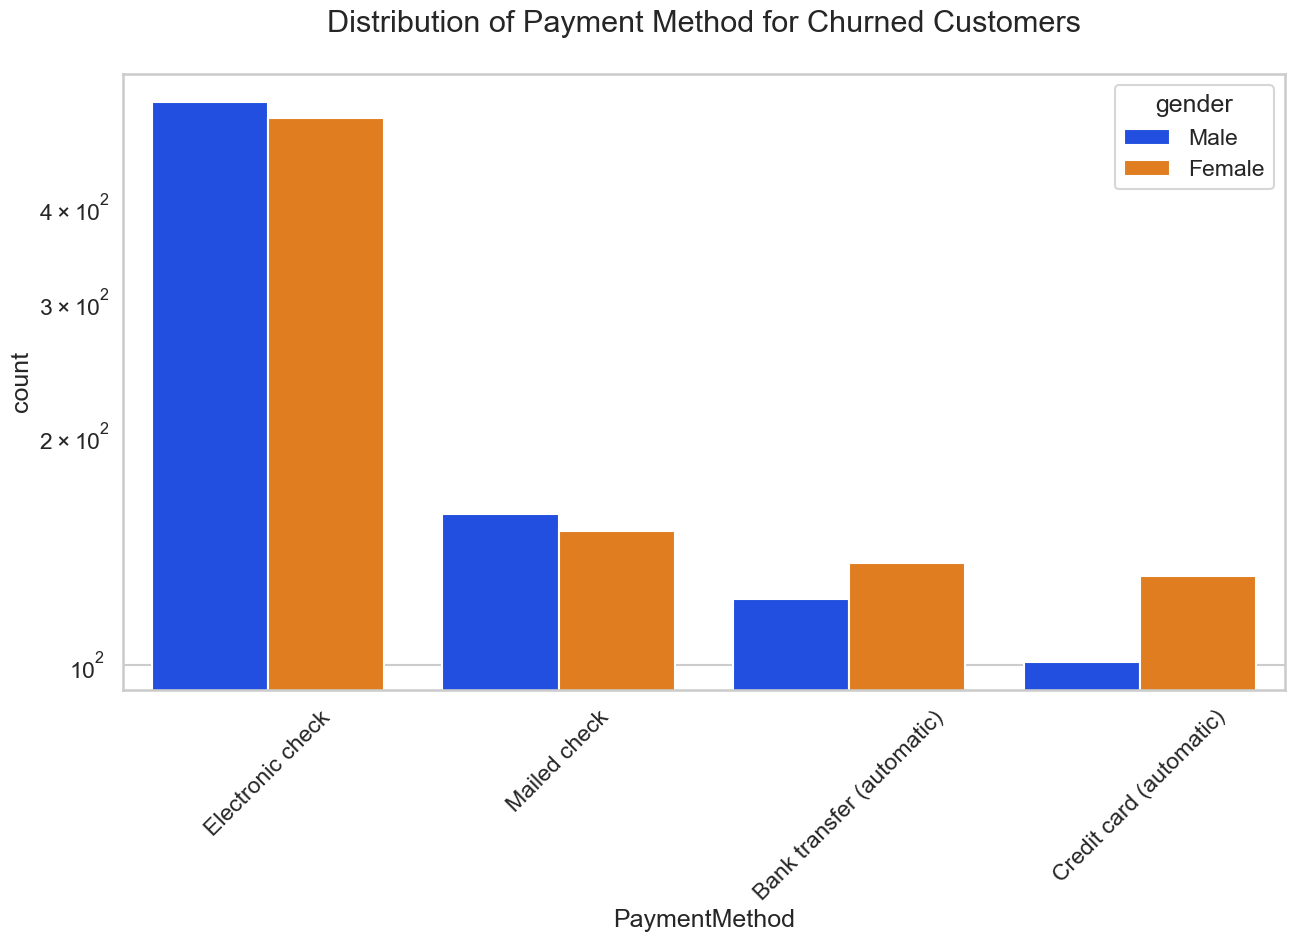

In [101]:
uniplot(df_ch1, col='PaymentMethod', title="Distribution of Payment Method for Churned Customers", hue='gender')

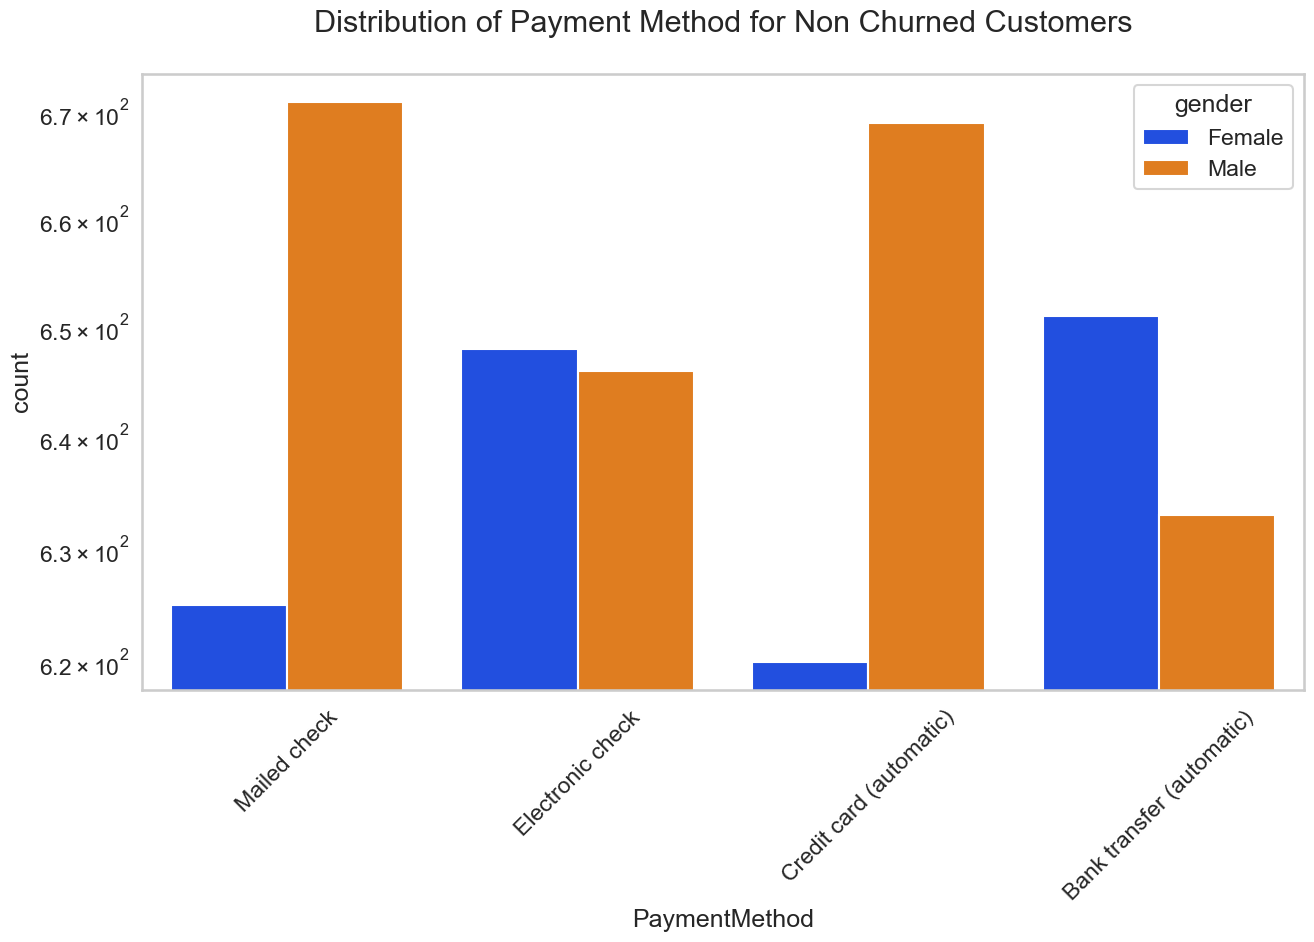

In [102]:
uniplot(df_ch0, col='PaymentMethod', title="Distribution of Payment Method for Non Churned Customers", hue='gender')

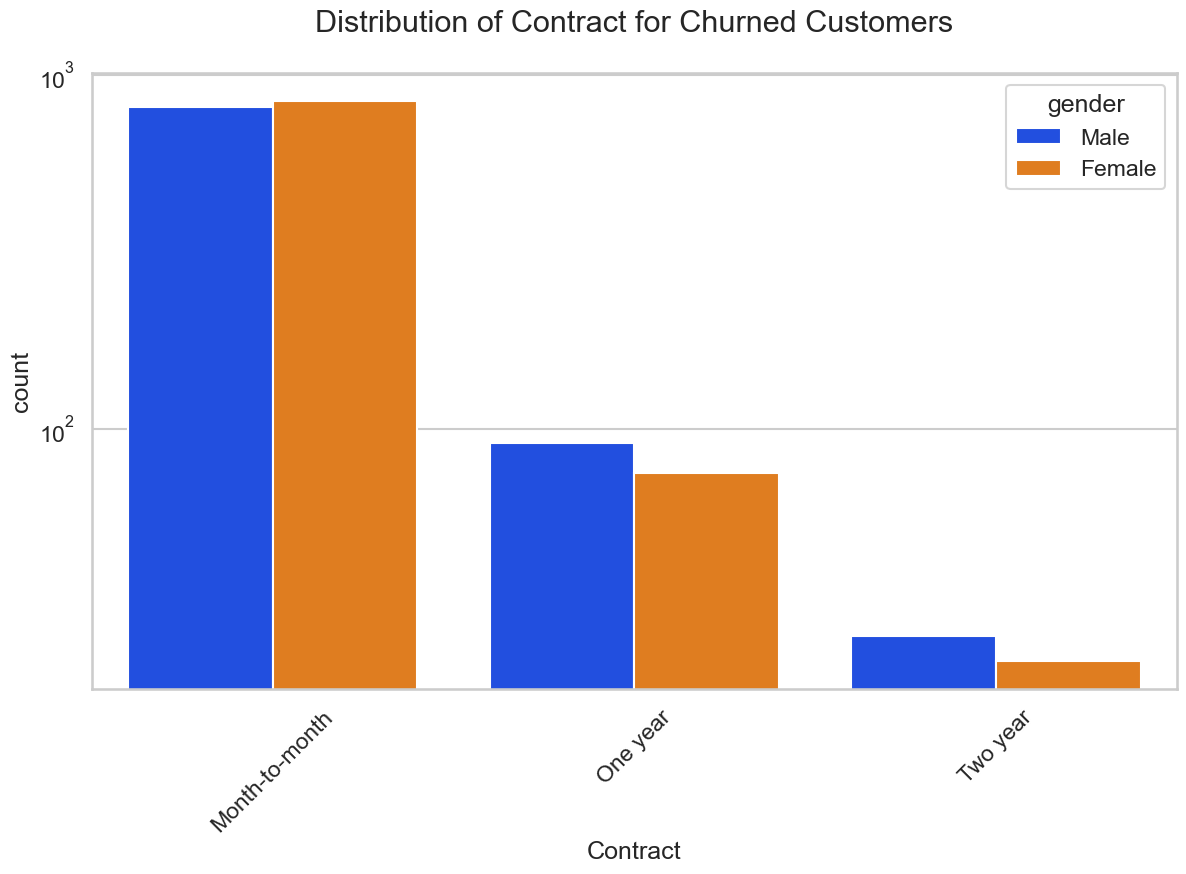

In [103]:
uniplot(df_ch1, col='Contract', title="Distribution of Contract for Churned Customers", hue='gender')

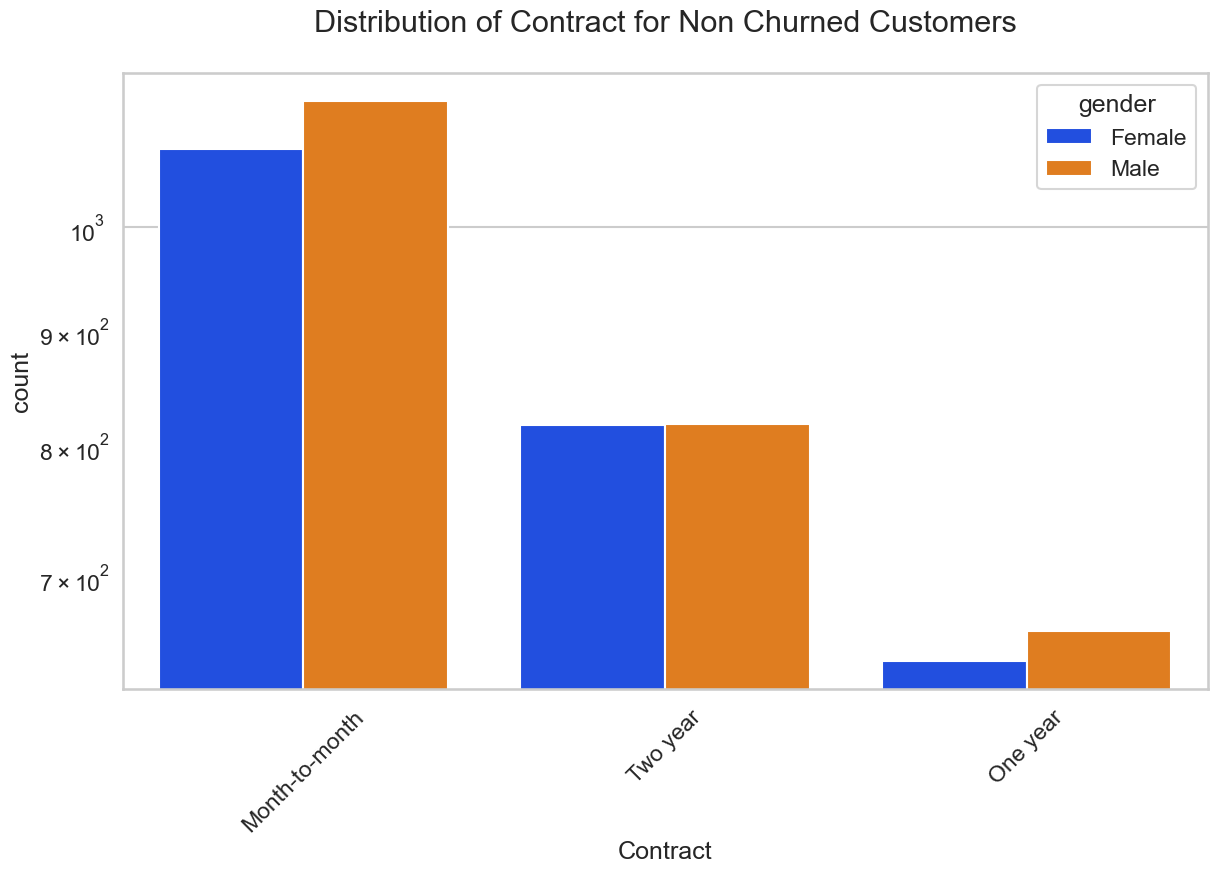

In [104]:
uniplot(df_ch0, col='Contract', title="Distribution of Contract for Non Churned Customers", hue='gender')

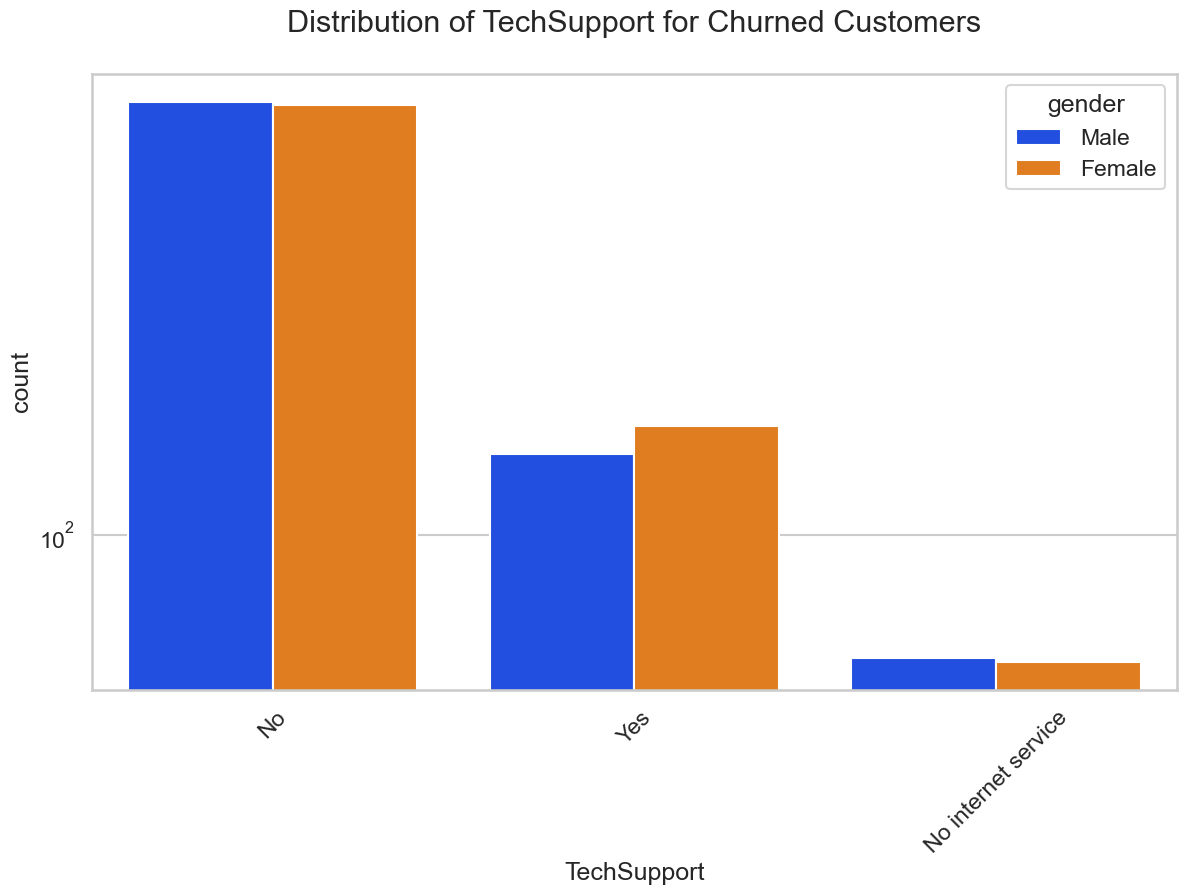

In [105]:
uniplot(df_ch1, col='TechSupport', title="Distribution of TechSupport for Churned Customers", hue='gender')

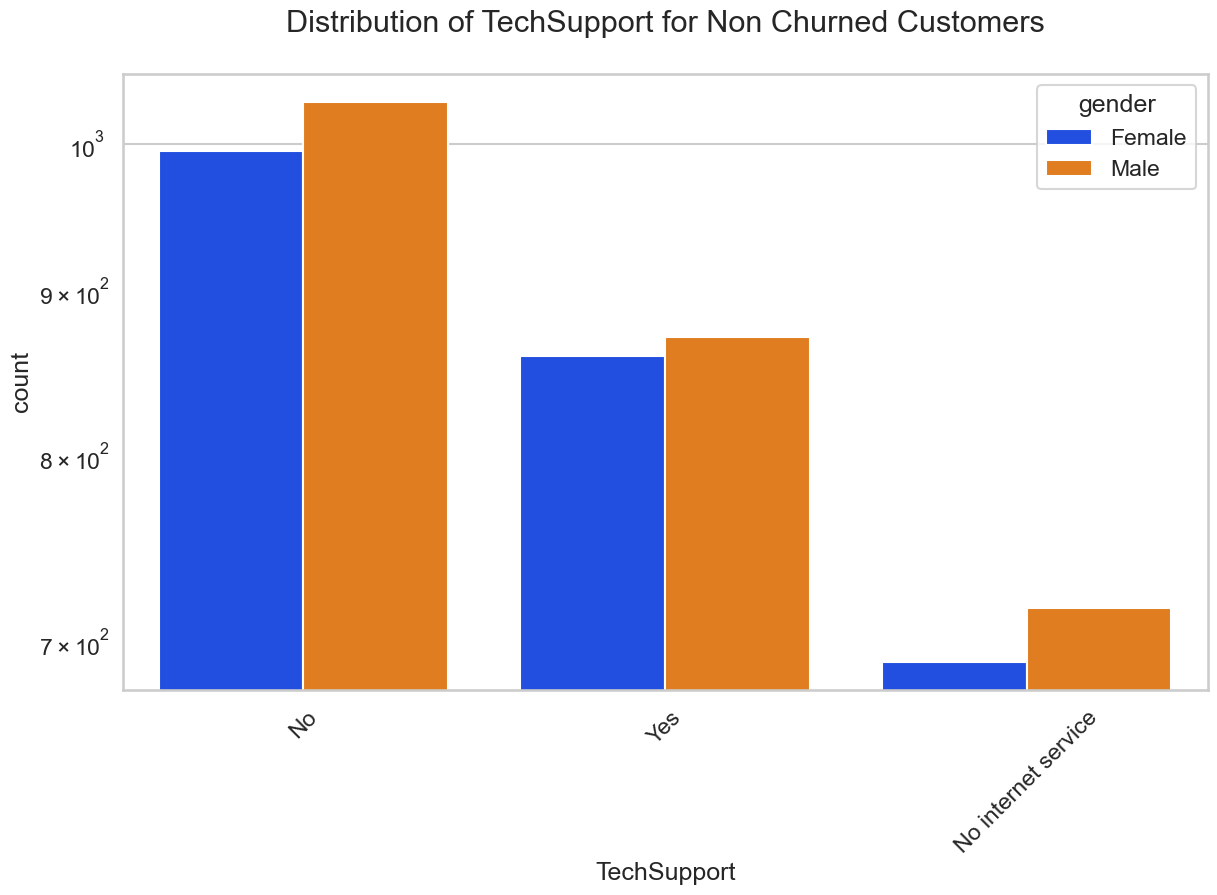

In [106]:
uniplot(df_ch0, col='TechSupport', title="Distribution of TechSupport for Non Churned Customers", hue='gender')

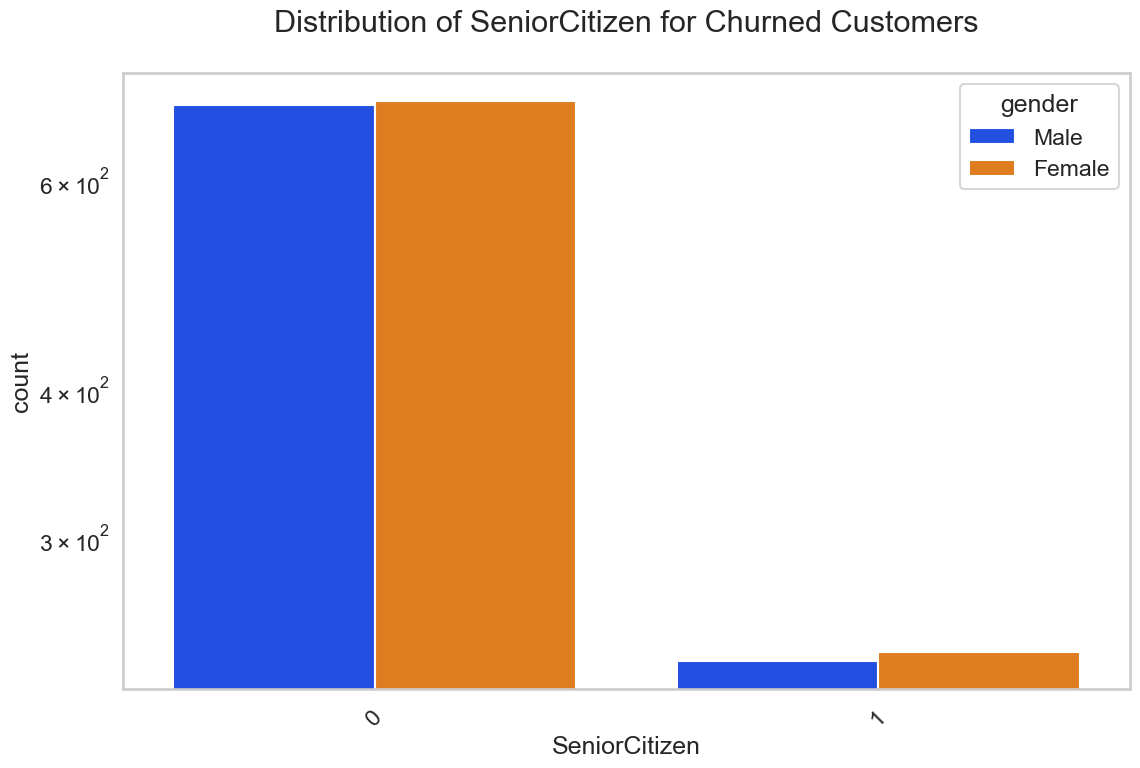

In [107]:
uniplot(df_ch1, col='SeniorCitizen', title="Distribution of SeniorCitizen for Churned Customers", hue='gender')

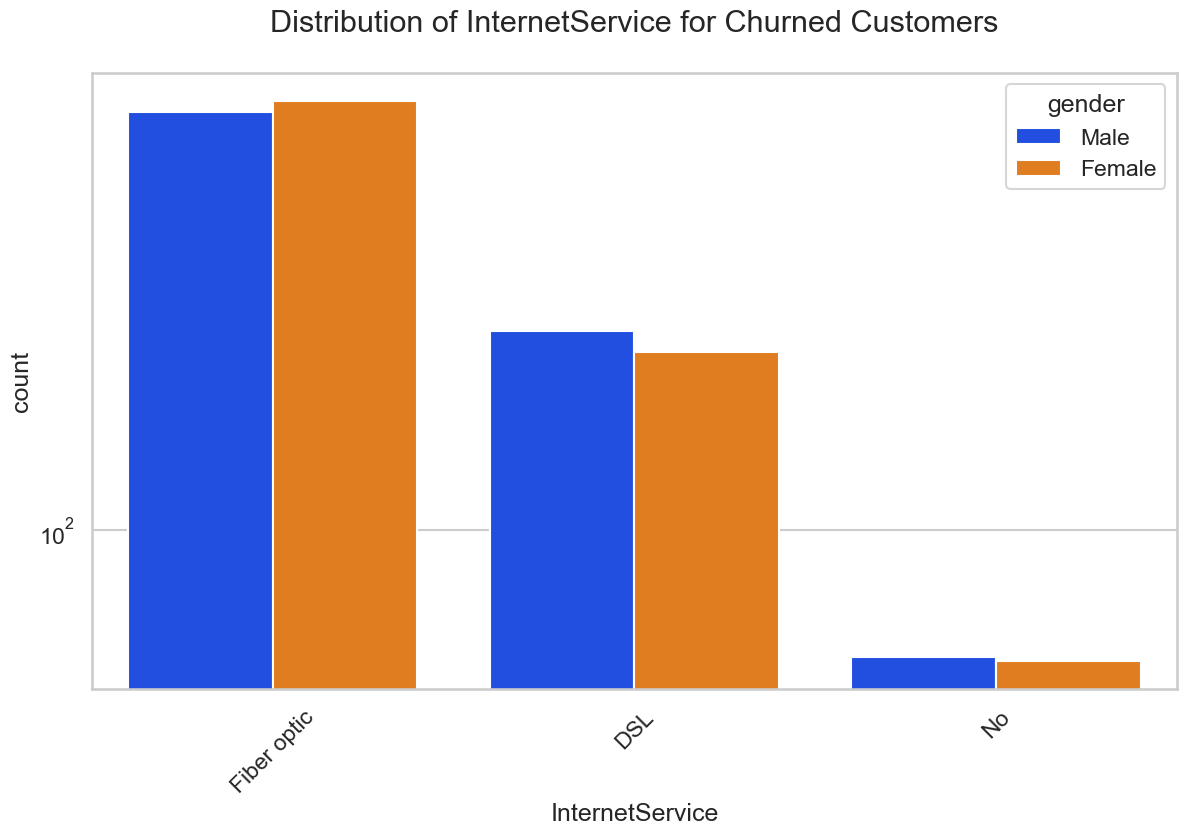

In [109]:
uniplot(df_ch1, col='InternetService', title="Distribution of InternetService for Churned Customers", hue='gender')

There are six additional services for customers with internet:

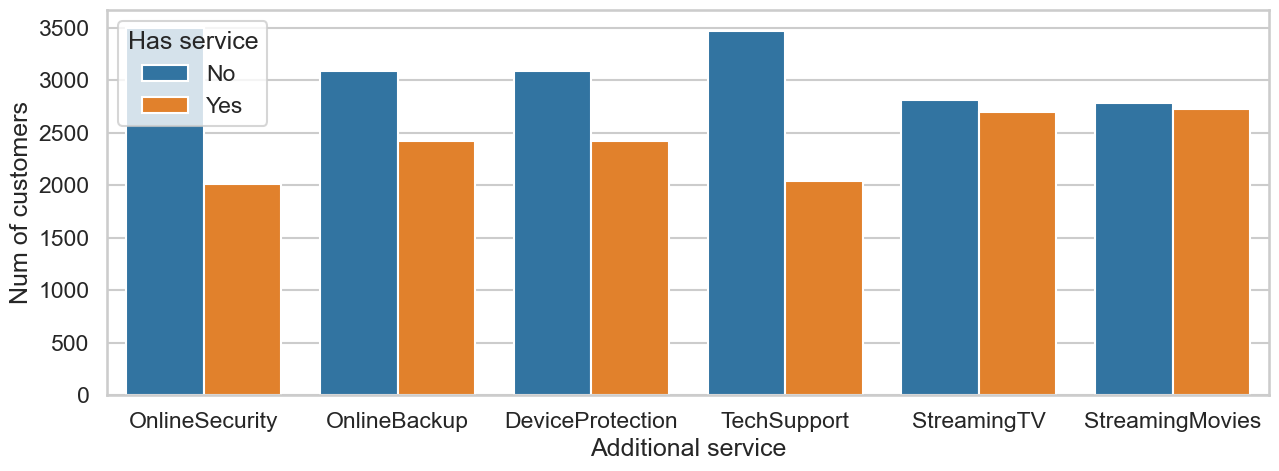

In [113]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(t_data[t_data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

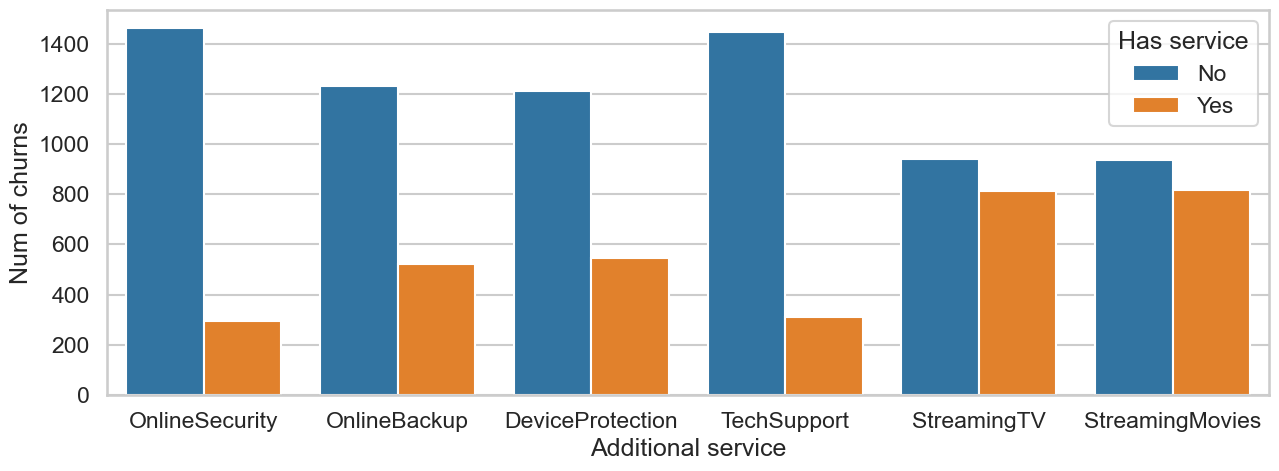

In [120]:
plt.figure(figsize=(15, 5))
df1 = t_data[(t_data.InternetService != 0) & (t_data.Churn == 1)]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

**Conclusion**

* Clients without internet have a very low churn rate
* Customers with fiber are more probable to churn than those with DSL connection
* Customers with the first 4 additionals (security to tech support) are more unlikely to churn
* Streaming service is not predictive for churn
* Customers with paperless billing are more probable to churn
* The payment method, Electronic check has a very high churn rate
* Short term contracts have higher churn rates
* Longer contracts are more affected by higher monthly charges (for churn rate).
* Non senior citizens are churners
 


In [121]:
t_data_dummies.to_csv('telco_churn_data.csv')